# Eliminacion e Imputacion de Valores Faltantes

## Librerias

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno

## Cargar Datos

Conjunto de datos referentes a encuestas de salud sobre la población de EE.UU. Archivo de tipo csv ubicado en la carpeta data. Contiene 34 variables y 245 observaciones

In [12]:
datos = pd.read_csv('./data/riskfactors.csv')

df = pd.DataFrame(datos)

df

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6.0,...,No,NaN,NaN,NaN,1095.0,261.0,104.0,156.0,521.0,12.0
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5.0,...,No,NaN,NaN,NaN,52.0,209.0,52.0,0.0,52.0,0.0
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4.0,...,No,NaN,NaN,NaN,36.0,156.0,52.0,24.0,24.0,24.0
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6.0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5.0,...,Yes,Everyday,Yes,NaN,-7.0,261.0,209.0,261.0,365.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4.0,...,No,NaN,NaN,NaN,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4.0,...,No,NaN,NaN,NaN,52.0,52.0,52.0,24.0,52.0,24.0
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6.0,...,Yes,Not@All,NaN,7.0,365.0,156.0,104.0,52.0,730.0,365.0
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4.0,...,Yes,Everyday,No,NaN,730.0,0.0,24.0,156.0,104.0,0.0


## Eliminacion por pares (Pairwise Deletion)

Consiste en eliminar los valores faltantes de una variable. Pandas por defecto omite los valores faltantes de las variables a la hora de realizar un calculo. Veamos el siguiente ejemplo 

In [13]:
# Cantidad de valores faltantes de la variable weight
df.weight_lbs.isna().sum()

10

In [14]:
# Cantidad de observaciones de weight VS cantidad de observaciones completas de weight
df.weight_lbs.size, df.weight_lbs.count()

(245, 235)

El resultado indica que hay 245 observaciones para la variable weight de las cuales 235 estan completas.

In [15]:
# calcular la media de la variable weight
(
    df
    .weight_lbs
    .mean()
)

174.26808510638298

A pesar que la variable weight posee 10 valores faltantes, Pandas realiza el calculo de la media omitiendo los valores faltantes.

## Eliminacion por caso completo (Listwise Deletion)

Consiste en eliminar las observaciones o registros donde aparezcan un valor faltante en una o  varias variables seleccionadas. En lo que sigue, utilizaremos las variables weight y height

### Listwise Deletion en funcion de una variable

In [16]:
# eliminar los registros con valores faltantes en la variable weight
(
    df                          # Dataframe
    .dropna(
        subset=['weight_lbs'],  # variable seleccionada
        how='any'               # modo de deteccion
    )
).shape                         # forma del DataFrame

(235, 34)

Observamos que fueron eliminados 10 registros los cuales tenian valores faltantes en la variable weight. Para visualizar la variable despues de eliminar los valores faltantes utilizamos el siguiente codigo:

<AxesSubplot:>

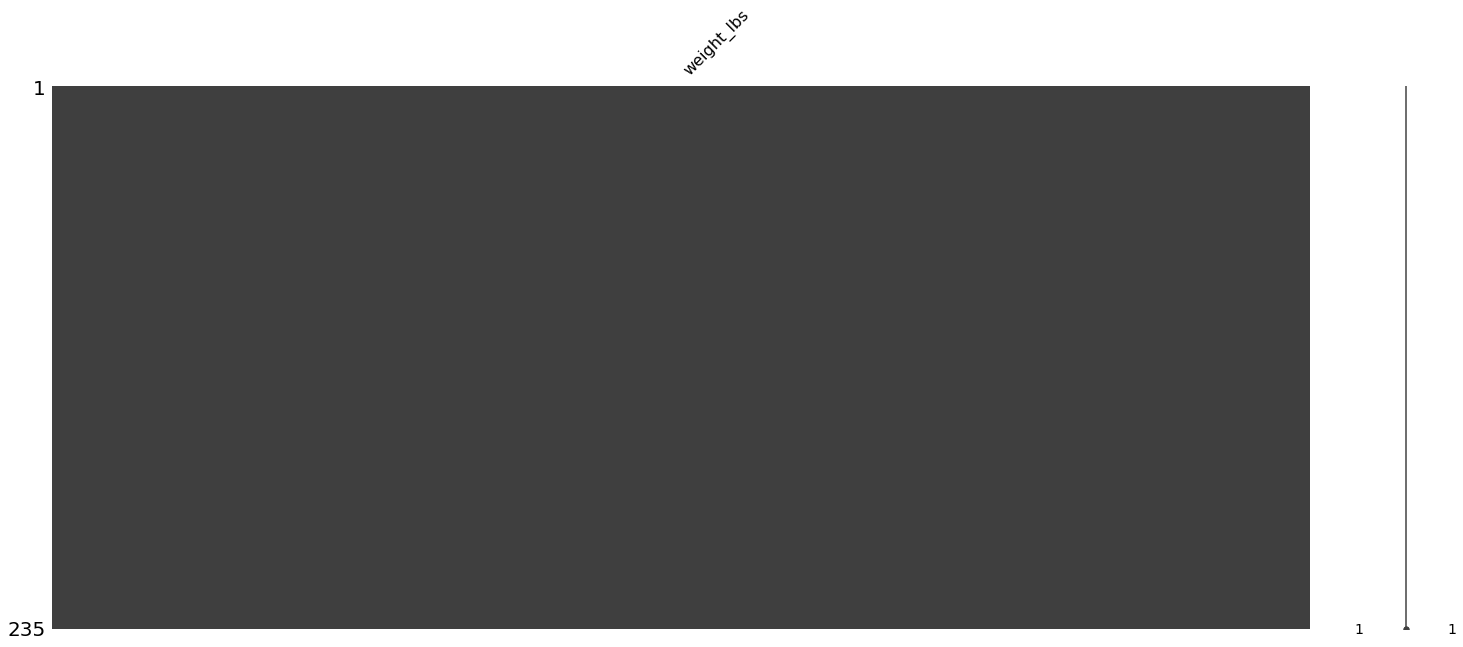

In [20]:
(
    df                          # Dataframe
    .dropna(
        subset=['weight_lbs'],  # variable seleccionada
        how='any'               # modo de deteccion
    )
    .loc[:,['weight_lbs']]
    .pipe(missingno.matrix)
)

Notamos que la variable queda limpia de valores faltantes lista para ser trabajada

### Listwise Deletion en funcion de dos variables

Elimina las observaciones donde hayan valores faltantes en cualquiera de las dos variables seleccionadas

In [17]:
# eliminar registros donde hayan valores faltantes en weight y height
(
    df                                          # Dataframe
    .dropna(
        subset=['weight_lbs', 'height_inch'],   # variables seleccionadas
        how='any'                               # modo de deteccion
    )
).shape                                         # forma del Dataframe

(234, 34)

Vemos que fueron eliminados 11 registros con valores faltantes en weight y height. Para visualizar ambas variables despues de aplicar el metodo utilizamos el siguiente codigo:

<AxesSubplot:>

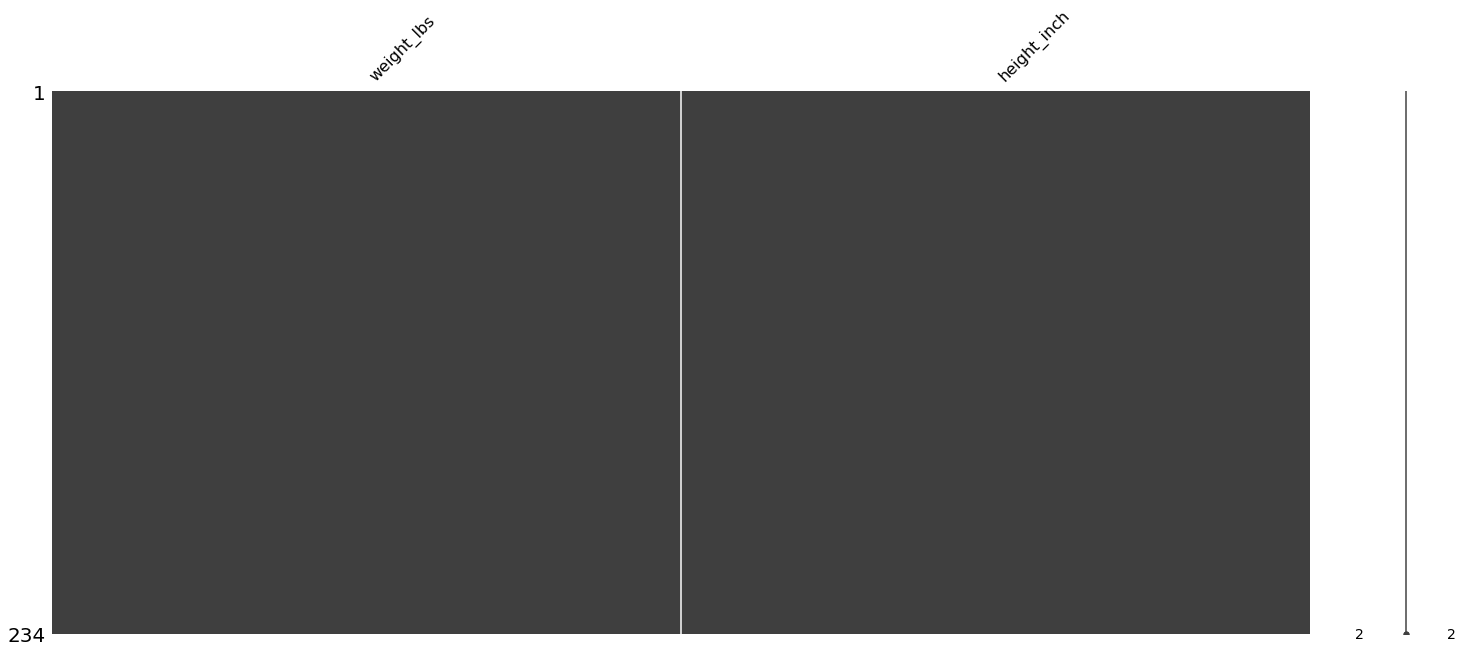

In [19]:
# Visualizacion de las variables despues de eliminar los registros
(
    df
    .dropna(
        subset=['weight_lbs', 'height_inch'], # variables seleccionadas
        how='any'                             # modo de deteccion
    )
    .loc[:,['weight_lbs', 'height_inch']]     # variables a graficar
    .pipe(missingno.matrix)                   # grafica de matriz para ambas variables
)

Claramente vemos que ambas variables quedan libres de valores faltantes.